# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
# Импортирую библиотеку pandas
import pandas as pd

In [2]:
# Для работы с графиками необходимо подгрузить библиотеку(это понадобится позже)
import matplotlib.pyplot as plt

In [3]:
# Читаю csv-файл
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
# Изучаю данные. вывожу первые 5 строк на экран
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
# Использую info(), что бы увидеть информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В столбцах замечены пропуски и неподходящий тип данных(object).
Такой тип данных не подходит для работы, система видит его не как число или строку. Например, с ячейками типа object нельзя производить арифметические операции.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

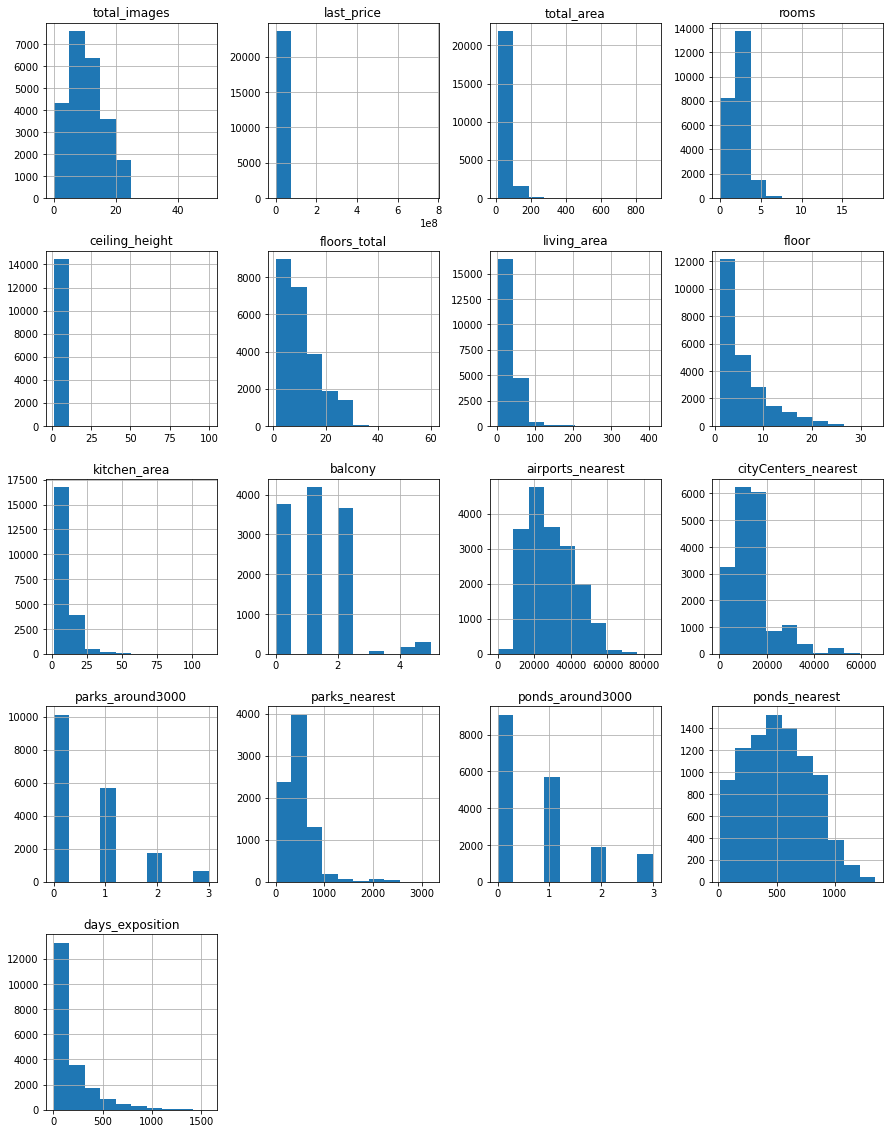

In [6]:
# Строю гистограмму по каждому столбцу
data.hist(figsize=(15, 20))

В столбцах balcony, park_nearest и cityCenters_nearest имеются выбросы. Проверю их в будущем

### Выполните предобработку данных

#### Первым этапом предобработки является выявление пропусков. Займусь этим

In [7]:
# Методы isna() и sum() подсчитывают количетсво пропусков в данных
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Начинаю обрабатывать пропуски
Изучу какой столбец за что отвечает(в задании расписан каждый столбец). 

Заполняю пропуски в столбце balcony. 
Вероятно, если люди не отметили наличие балкона, значит его просто нет. Можно отметить пропуски как 0

In [8]:
data['balcony'] = data['balcony'].fillna(0)

Подобно столбцу balcony можно поступить с is_apartment. 
Скорее всего, если пропустили это значние, значит это помещение изначально недвижимость.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna('False')

В столбцах parks_around3000 и ponds_around3000 одинаковое количество пропусков. 
Можно предположить, что люди не знают, что в районе 3 километров рядом с ними присутвует парк и водоем. 
Думаю будет корректно поставить 1 вместо пропусков в этих столбцах. Так как 3 км - это достаточно большое расстояние, указанные категории должны найтись в таком радиусе.

In [10]:
data[['parks_around3000', 'ponds_around3000']] = data[['parks_around3000', 'ponds_around3000']].fillna('1')

Не вижу больше возможности изменить другие столбцы подобным способом.
Проверю остались ли ещё пропуски в этих столбцах.

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

На данном этапе пропуски удалены.
Остальные пропуски в данных дупущены из-за халатности заполняющих или ошибки в обработке информации.

#### Следующий этап. Изменение типов данных

In [12]:
# Вызову info() и head() что бы не "бегать" по проекту
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В датафрейме присутствет 5 типов object. Их стоит изменить, для работы со столбцами. 
В столбце first_day_exposition следует привести дату и время к подобающему виду.

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Столбец is_apartment состоит из True и False. Следует изменить его тип на bool.

In [14]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Столбец locality_name состоит из названий населенных пунктов. Следует изменить его тип на str.

In [15]:
data['locality_name'] = data['locality_name'].astype('string')

Столбцы parks_around3000 и ponds_around3000 так же object. Для их изменения следует воспользоваться методом to_numeric().

In [16]:
columns = ['parks_around3000', 'ponds_around3000']

for column in columns:
    data[column] = pd.to_numeric(data[column], errors='raise')

In [17]:
# Вызову info() и head() для проверки
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Итак, типы данных изменены. Теперь можно приступать к следующему этапу.

#### Поиск и обработка неявных дубликатов

In [18]:
# Посмотрю уникальные значение методом unique()
data['locality_name'].unique()

<StringArray>
[          'Санкт-Петербург',            'посёлок Шушары',
 'городской посёлок Янино-1',         'посёлок Парголово',
            'посёлок Мурино',                 'Ломоносов',
                 'Сертолово',                  'Петергоф',
                    'Пушкин',           'деревня Кудрово',
 ...
   'деревня Большое Рейзино',   'деревня Малая Романовка',
       'поселок Дружноселье',            'поселок Пчевжа',
       'поселок Володарское',            'деревня Нижняя',
 'коттеджный посёлок Лесное',         'деревня Тихковицы',
    'деревня Борисова Грива',      'посёлок Дзержинского']
Length: 365, dtype: string

Теперь следует привести все наименования столбца к общему(удобному) виду.

In [19]:
data['locality_name'] = data['locality_name'].str.lower()

Обработаю буквы "е" и "ё", они повторяются в названиях населенных пунктов. Так же, заменю похожие значения на одно конкретное.

In [20]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['посёлок', 'поселок городского типа', 'поселок городского типа ', 'городской поселок', 'коттеджный поселок'], 'поселок', regex=True)
) 

Проверяю итоговый результат.

In [21]:
# Метод .unique() показывает уникальные значения
data['locality_name'].unique()

<StringArray>
[          'санкт-петербург',            'поселок шушары',
 'городской поселок янино-1',         'поселок парголово',
            'поселок мурино',                 'ломоносов',
                 'сертолово',                  'петергоф',
                    'пушкин',           'деревня кудрово',
 ...
   'деревня большое рейзино',   'деревня малая романовка',
       'поселок дружноселье',            'поселок пчевжа',
       'поселок володарское',            'деревня нижняя',
 'коттеджный поселок лесное',         'деревня тихковицы',
    'деревня борисова грива',      'поселок дзержинского']
Length: 331, dtype: string

Примечание для ревьюера
Уточнил у преподавателя(@svyumedvedeva). Она подтвердила, что код рабоатет корректно и значения заменены на "поселок". Согласно методу replace(). Странно, что сейчас эти значнеия остались без изменений...

Названия населенных пунктов приведены к общему виду и неявные дубликаты удалены.

#### Вывод по разделу

Я привел названия населенных пунктов к одному виду, это было сделано для более удобной обработки. И избавился от тех дубликатов, которые нашел.

### Добавьте в таблицу новые столбцы

Освежу знания о названии имеющихся столбцов.

In [22]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,...,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,...,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Добавляю новый столбец в таблицу: Цена за один квадратный метр. Округляю до двух знаков после запятой.
Для этого создаю новый столбец, делю стоимость на общую площадь, а метод round() оставит два знака после запятой.

In [23]:
data['price_per_m2'] = (data['last_price'] / data['total_area']).round(2)

Добавляю новые стобцы в таблицу: День недели публикации, Месяц публикации и Год публикации.
Для этого использую метод dt.weekday, dt.month и dt.year, соответственно. Эти методы выводят указанное значение.

In [24]:
data['day_of_publication'] = data['first_day_exposition'].dt.weekday
data['month_of_publication'] = data['first_day_exposition'].dt.month
data['year_of_publication'] = data['first_day_exposition'].dt.year

Смотрю на получившийся результат.

In [25]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_of_publication,month_of_publication,year_of_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


Проверяю по первой дате "2019-03-07". 
В столбце "day_of_publication" указан номер 3, это четверг. Метод dt.weekday присваивает номера следующим образом: 0 - понедельник, 1 - вторник и тд.
В столбцах "month_of_publication" и "year_of_publication" так же указаны верные данные.

Добавляю новый стобец в таблицу: Тип этажа квартиры.
Думаю, для решения этой задачи следует воспользоваться добавлением функции с row и if-else.

In [26]:
def determine_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

# Указыв axis=1 метод apply() применяет этоу функцию ко всем строкам
data['floor_types'] = data.apply(determine_floor_type, axis=1)

In [27]:
# Проверяю результат
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_of_publication,month_of_publication,year_of_publication,floor_types
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой


В таблице указан тип этажа.

Добавляю новый стобец в таблицу: Расстояние до центра в километрах.

In [28]:
data['cityCenters_nearest_in_km'] = (data['cityCenters_nearest'] / 1000).round()

Проверяю не появилось ли аномальных значений после добавления столбцов.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               23699 non-null  int64         
 1   last_price                 23699 non-null  float64       
 2   total_area                 23699 non-null  float64       
 3   first_day_exposition       23699 non-null  datetime64[ns]
 4   rooms                      23699 non-null  int64         
 5   ceiling_height             14504 non-null  float64       
 6   floors_total               23613 non-null  float64       
 7   living_area                21796 non-null  float64       
 8   floor                      23699 non-null  int64         
 9   is_apartment               23699 non-null  bool          
 10  studio                     23699 non-null  bool          
 11  open_plan                  23699 non-null  bool          
 12  kitc

В одном из добавленных мною столбцов тип данных - object. Это нужно исправить.

In [30]:
# Для этого использую метод astype()
data['floor_types'] = data['floor_types'].astype('string')

Проверяю корректность данных.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               23699 non-null  int64         
 1   last_price                 23699 non-null  float64       
 2   total_area                 23699 non-null  float64       
 3   first_day_exposition       23699 non-null  datetime64[ns]
 4   rooms                      23699 non-null  int64         
 5   ceiling_height             14504 non-null  float64       
 6   floors_total               23613 non-null  float64       
 7   living_area                21796 non-null  float64       
 8   floor                      23699 non-null  int64         
 9   is_apartment               23699 non-null  bool          
 10  studio                     23699 non-null  bool          
 11  open_plan                  23699 non-null  bool          
 12  kitc

Типы данных записаны верно.

In [32]:
# Смотрю итоговый результат
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_of_publication,month_of_publication,year_of_publication,floor_types,cityCenters_nearest_in_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


Данные посчитаны и выведены в новые столбцы.

#### Выводы по разделу

Я добавил несколько очень важных столбцов, которые понадобятся в будущем. Например, цена за квадратный метр('price_per_m2') и расстояние до центра в километрах('cityCenters_nearest_in_km'). Остальные столбцы указаны в таблице. Благодаря этой работе я смогу провести последующее исследование гораздо быстрее.
Так же, обработал типы данных, для более удобной работы.

### Проведите исследовательский анализ данных

Для более удобной навигации по столбцам, с которыми планирую работать просмотрю их ещё раз.

In [33]:
# Вызываю метод info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               23699 non-null  int64         
 1   last_price                 23699 non-null  float64       
 2   total_area                 23699 non-null  float64       
 3   first_day_exposition       23699 non-null  datetime64[ns]
 4   rooms                      23699 non-null  int64         
 5   ceiling_height             14504 non-null  float64       
 6   floors_total               23613 non-null  float64       
 7   living_area                21796 non-null  float64       
 8   floor                      23699 non-null  int64         
 9   is_apartment               23699 non-null  bool          
 10  studio                     23699 non-null  bool          
 11  open_plan                  23699 non-null  bool          
 12  kitc

Необходимо построить гистограммы для определенных столбцов.
Для удобства выведу нужные столбцы в отдельную переменную.

In [34]:
columns_to_hist = [
    'total_area',
    'living_area',
    'kitchen_area',
    'last_price',
    'rooms',
    'ceiling_height',
    'floor_types', 
    'floors_total',
    'cityCenters_nearest',
    'parks_nearest'
]

#### Детально рассмотрю каждый столбец

Воспользуюсь matplotlib.pyplot как plt(подгрузил в самом начале работы). Буду строить гистограммы для каждого выделенного столбца.

Столбец 'total_area'(общая площадь) включает в себя много данных. Следует немного ограничить разброс(сделал это для общей картины, но данные будут учтены и проверены на следующем этапе).

Text(0, 0.5, 'Количество квартир')

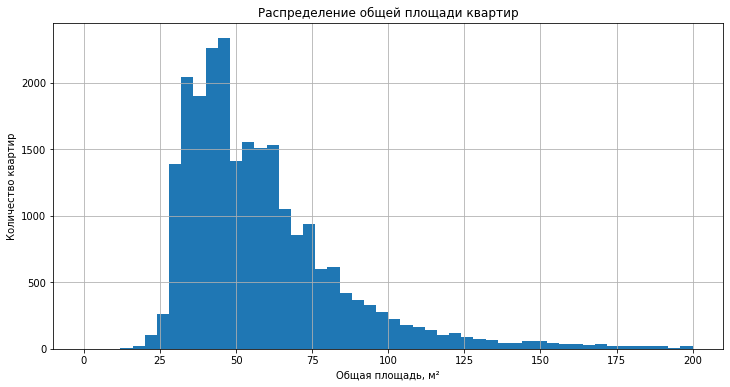

In [35]:
data['total_area'].hist(bins=50, range=(0, 200),figsize=(12, 6), grid=True)

# Выожу названия в отдельные строки
plt.title('Распределение общей площади квартир')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Количество квартир')

Данные показывают нестандартную картину, но приемлимую. В ходе работы я осуществвлю более детальную проверку.

Столбец 'living_area'(жилая площадь) так же включает в себя много данных. Следует немного ограничить разброс(сделал это для общей картины, но данные будут учтены и проверены на следующем этапе)

Text(0, 0.5, 'Количество квартир')

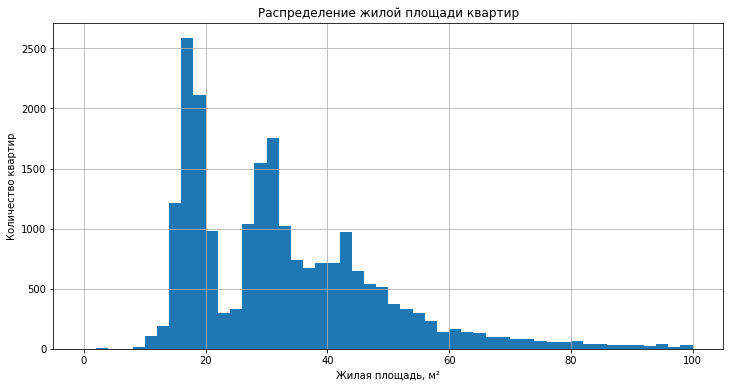

In [36]:
data['living_area'].hist(bins=50, range=(0, 100),figsize=(12, 6), grid=True)

plt.title('Распределение жилой площади квартир')
plt.xlabel('Жилая площадь, м²')
plt.ylabel('Количество квартир')

Явно есть пропуски в данных. Примрно на 25 и 40 м² присутствуют резкие перепады

И со столбцом 'kitchen_area'(площадь кухни) поступлю так же

Text(0, 0.5, 'Количество квартир')

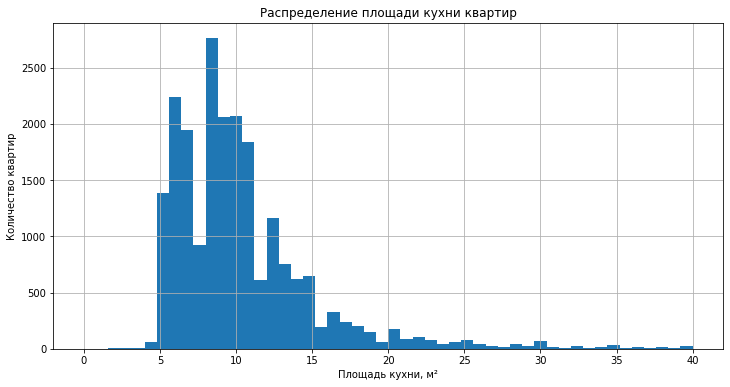

In [37]:
data['kitchen_area'].hist(bins=50, range=(0, 40), figsize=(12, 6), grid=True)

plt.title('Распределение площади кухни квартир')
plt.xlabel('Площадь кухни, м²')
plt.ylabel('Количество квартир')

Здесь похожая ситуация как с жилой площадью. Есть пропуски и выбитые значения

Ограничу таблицу 20 миллионами рублей за квартиру. Да, покажутся не все данные. Но, думаю, этого достаточно для первичного анализа.

Text(0, 0.5, 'Количество квартир')

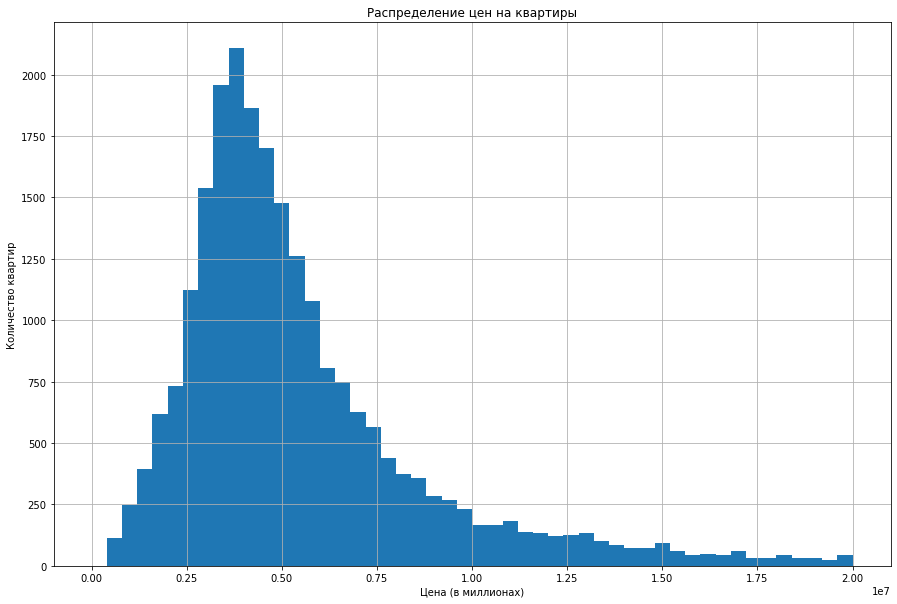

In [38]:
data['last_price'].hist(bins=50, range=(0, 20000000), figsize=(15, 10), grid=True)

plt.title('Распределение цен на квартиры')
plt.xlabel('Цена (в миллионах)')
plt.ylabel('Количество квартир')

Наконец данные пришли оптимальный вид

Для вывода количества комнат подойдет самая простая гистограмма. Но с ограничением от студии(0) до 6 комнат

Text(0, 0.5, 'Количество квартир')

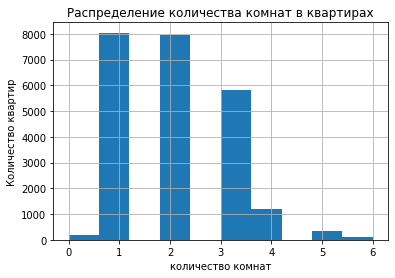

In [39]:
data['rooms'].hist(bins=10, range=(0, 6), grid=True)

plt.title('Распределение количества комнат в квартирах')
plt.xlabel('количество комнат')
plt.ylabel('Количество квартир')

Видно, что больше всего объявлений 1 и 2 комнат в квартирах.

Высота потолков. Ограничу таблицу от 1,5 м до 4. Меньше и выше этих значений считаются аномальными, их проверю позже

Text(0, 0.5, 'Количетсво квартир')

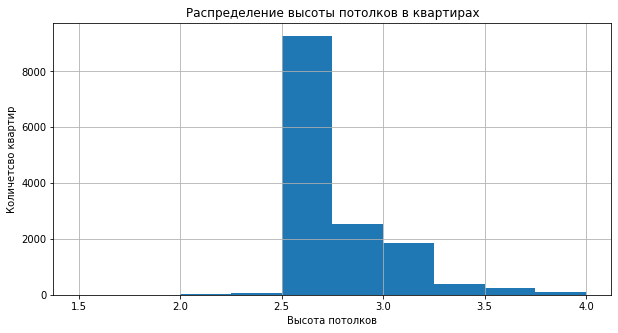

In [40]:
data['ceiling_height'].hist(bins=10, range=(1.5, 4), figsize=(10, 5), grid=True)

plt.title('Распределение высоты потолков в квартирах')
plt.xlabel('Высота потолков')
plt.ylabel('Количетсво квартир')

Text(0, 0.5, 'Количетсво объявлений')

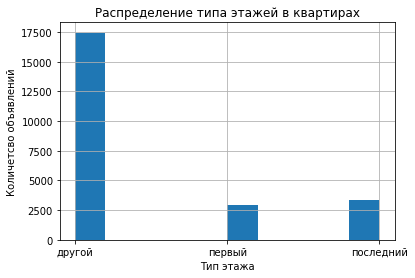

In [41]:
data['floor_types'].hist(bins=10, grid=True)

# Выожу названия в отдельные строки
plt.title('Распределение типа этажей в квартирах')
plt.xlabel('Тип этажа')
plt.ylabel('Количетсво объявлений')

Количетсво объявлений не первого и последнего этажа сильно выше, чем других

Для количества этажей выведу данные от 2 до 30 этажей. Иные типы либо частные дома, либо аномальное значение.

Text(0, 0.5, 'Количетсво объявлений')

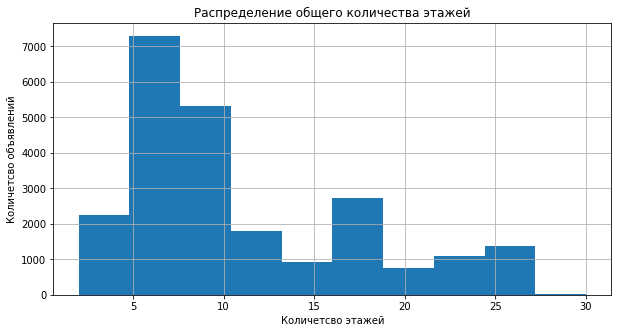

In [42]:
data['floors_total'].hist(bins=10, range=(2, 30), figsize=(10, 5), grid=True)

plt.title('Распределение общего количества этажей')
plt.xlabel('Количетсво этажей')
plt.ylabel('Количетсво объявлений')

Text(0, 0.5, 'Количество квартир')

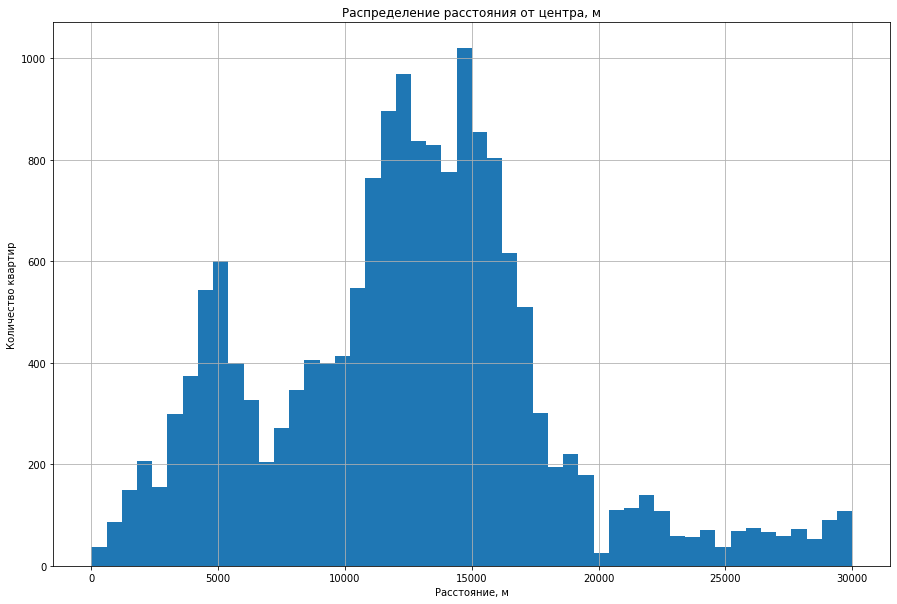

In [43]:
data['cityCenters_nearest'].hist(bins=50, range=(0, 30000), figsize=(15, 10), grid=True)

plt.title('Распределение расстояния от центра, м')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')

Видно, что присутствуют выбросы и пропуски. Но, к сожалению, я не смогу их запонить.

Text(0, 0.5, 'Количество квартир')

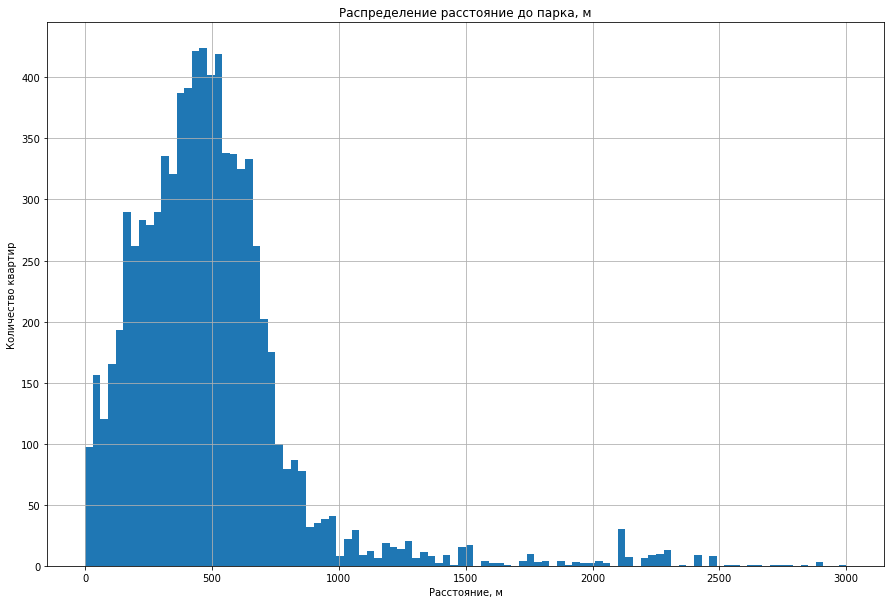

In [44]:
data['parks_nearest'].hist(bins=100, range=(0, 3000), figsize=(15, 10), grid=True)

plt.title('Распределение расстояние до парка, м')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')

В этом столбце присутсвет множество пропусков. Это видно по количеству объявлений

Итак, я получил общую информацию о заднных столбцах по гистограммам. Вижу, что во многих есть выбитые значения

#### Теперь следует заняться столбцами по отдельности

Посмотрю почему в столбце total_area есть выбитые значнения

In [45]:
data[data['total_area'] > 100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_of_publication,month_of_publication,year_of_publication,floor_types,cityCenters_nearest_in_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
19,16,14200000.0,121.00,2019-01-09,3,2.75,16.0,76.0,8,True,...,NaN,0.0,NaN,97.0,117355.37,2,1,2019,другой,13.0
35,6,15500000.0,149.00,2017-06-26,5,NaN,5.0,104.0,4,True,...,NaN,1.0,779.0,644.0,104026.85,0,6,2017,другой,4.0
42,13,22000000.0,161.80,2015-07-08,4,2.80,4.0,80.9,2,False,...,47.0,1.0,907.0,987.0,135970.33,2,7,2015,другой,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23631,17,14799000.0,104.00,2018-11-18,3,3.10,4.0,66.0,2,True,...,NaN,1.0,553.0,90.0,142298.08,6,11,2018,другой,14.0
23664,5,9000000.0,110.00,2015-12-10,4,3.36,7.0,64.6,5,True,...,417.0,1.0,118.0,816.0,81818.18,3,12,2015,другой,5.0
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26.0,71.4,17,True,...,NaN,0.0,NaN,NaN,147586.21,4,11,2018,другой,11.0
23688,19,9200000.0,101.00,2019-04-01,3,3.05,15.0,63.0,12,True,...,NaN,0.0,NaN,23.0,91089.11,0,4,2019,другой,14.0


Проверил значения обзей площади больше 100 м2. Кажется, что это много, но если посмотреть на столбец living_area, то эти данные соотносятся с общей площадью.
Проверю значения больше 200

In [46]:
data[data['total_area'] > 200]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_of_publication,month_of_publication,year_of_publication,floor_types,cityCenters_nearest_in_km
155,8,96000000.0,317.0,2017-07-07,4,3.50,3.0,183.0,3,True,...,508.0,3.0,366.0,62.0,302839.12,4,7,2017,последний,2.0
464,15,66571000.0,280.3,2015-06-11,6,5.20,8.0,159.5,7,True,...,187.0,1.0,616.0,578.0,237499.11,3,6,2015,другой,7.0
492,18,95000000.0,216.0,2017-12-05,4,3.00,5.0,86.0,4,True,...,138.0,3.0,620.0,14.0,439814.81,1,12,2017,другой,0.0
509,5,90000000.0,225.0,2016-06-26,6,NaN,4.0,134.0,2,True,...,NaN,2.0,519.0,416.0,400000.00,6,6,2016,другой,6.0
521,20,25717300.0,230.1,2015-01-21,3,NaN,3.0,130.0,1,True,...,676.0,3.0,278.0,1441.0,111765.75,2,1,2015,первый,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23005,20,30750000.0,297.5,2018-09-09,6,3.14,4.0,181.8,2,True,...,189.0,3.0,40.0,42.0,103361.34,6,9,2018,другой,1.0
23281,20,24800000.0,231.2,2015-01-21,6,3.10,5.0,99.8,4,True,...,75.0,1.0,795.0,NaN,107266.44,2,1,2015,другой,2.0
23327,19,34400000.0,215.0,2019-03-15,5,2.75,4.0,82.4,4,True,...,NaN,0.0,NaN,NaN,160000.00,4,3,2019,последний,15.0
23400,17,30000000.0,213.0,2017-09-28,7,3.40,5.0,151.4,5,True,...,342.0,3.0,30.0,299.0,140845.07,3,9,2017,последний,1.0


Сразу видно, что не все строки заполненны корректно. Например, 492 строка. Общая площадь 216 м2, а жилая 86 м2. Слишком большая разница. Но, к сожалению, я не могу заменить данные в этих столбцах. Так как не знаю какие данные корректны

В столбце ceiling_height присутствует аномалия. Высота потолков выше 4,5 метра выглядит странно, проверю

In [47]:
data[data['ceiling_height'] > 4.5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_of_publication,month_of_publication,year_of_publication,floor_types,cityCenters_nearest_in_km
355,17,3600000.0,55.2,2018-07-12,2,25.00,5.0,32.0,2,False,...,NaN,1.0,NaN,259.0,65217.39,3,7,2018,другой,NaN
464,15,66571000.0,280.3,2015-06-11,6,5.20,8.0,159.5,7,True,...,187.0,1.0,616.0,578.0,237499.11,3,6,2015,другой,7.0
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3.0,190.0,3,True,...,NaN,1.0,603.0,NaN,500000.00,4,10,2018,последний,5.0
1053,13,550000.0,29.0,2018-02-01,1,5.00,3.0,NaN,1,False,...,NaN,1.0,NaN,6.0,18965.52,3,2,2018,первый,NaN
1300,14,120000000.0,280.0,2018-07-12,5,4.70,4.0,162.0,3,True,...,464.0,3.0,339.0,225.0,428571.43,3,7,2018,другой,4.0
1388,20,59800000.0,399.0,2015-01-21,5,5.60,6.0,NaN,6,True,...,149.0,2.0,577.0,719.0,149874.69,2,1,2015,последний,7.0
2802,7,14950000.0,50.0,2016-03-06,2,4.80,3.0,30.0,2,True,...,589.0,3.0,161.0,160.0,299000.00,6,3,2016,другой,2.0
3148,14,2900000.0,75.0,2018-11-12,3,32.00,3.0,53.0,2,True,...,NaN,1.0,NaN,NaN,38666.67,0,11,2018,другой,NaN
3474,3,1400000.0,30.0,2018-03-16,1,8.00,5.0,15.3,2,False,...,NaN,1.0,NaN,125.0,46666.67,4,3,2018,другой,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.00,9.0,30.0,2,True,...,658.0,1.0,331.0,181.0,95555.56,3,2,2018,другой,13.0


42 аномальных значения. Для начала обработую двухзначные. Они выглядят очень странно

In [48]:
data[data['ceiling_height'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_of_publication,month_of_publication,year_of_publication,floor_types,cityCenters_nearest_in_km
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,1.0,NaN,259.0,65217.39,3,7,2018,другой,NaN
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,True,...,NaN,1.0,NaN,NaN,38666.67,0,11,2018,другой,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,True,...,658.0,1.0,331.0,181.0,95555.56,3,2,2018,другой,13.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,True,...,NaN,1.0,NaN,28.0,120000.00,2,9,2017,другой,NaN
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,397.0,1.0,578.0,7.0,126229.51,2,10,2018,первый,8.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,True,...,NaN,1.0,NaN,540.0,46296.30,4,10,2017,другой,NaN
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,True,...,305.0,0.0,NaN,267.0,88000.00,1,8,2017,другой,11.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,True,...,NaN,3.0,80.0,38.0,101875.00,2,1,2019,другой,20.0
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,True,...,417.0,2.0,73.0,NaN,74324.32,0,3,2019,последний,51.0
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,True,...,NaN,0.0,NaN,NaN,94047.62,6,3,2017,другой,14.0


Для этого подойдет индексация. Выделяю столбец, который мне нужен, прописываю условие, что бы значения были больше 10 и делю их на 10. Таким образом например 27 м станет 2,7 м, что уже похоже на правду

In [49]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'] / 10

In [50]:
# Проверяю значения выше 4,5 метра
data[data['ceiling_height'] > 4.5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_of_publication,month_of_publication,year_of_publication,floor_types,cityCenters_nearest_in_km
464,15,66571000.0,280.3,2015-06-11,6,5.20,8.0,159.5,7,True,...,187.0,1.0,616.0,578.0,237499.11,3,6,2015,другой,7.0
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3.0,190.0,3,True,...,NaN,1.0,603.0,NaN,500000.00,4,10,2018,последний,5.0
1053,13,550000.0,29.0,2018-02-01,1,5.00,3.0,NaN,1,False,...,NaN,1.0,NaN,6.0,18965.52,3,2,2018,первый,NaN
1300,14,120000000.0,280.0,2018-07-12,5,4.70,4.0,162.0,3,True,...,464.0,3.0,339.0,225.0,428571.43,3,7,2018,другой,4.0
1388,20,59800000.0,399.0,2015-01-21,5,5.60,6.0,NaN,6,True,...,149.0,2.0,577.0,719.0,149874.69,2,1,2015,последний,7.0
2802,7,14950000.0,50.0,2016-03-06,2,4.80,3.0,30.0,2,True,...,589.0,3.0,161.0,160.0,299000.00,6,3,2016,другой,2.0
3474,3,1400000.0,30.0,2018-03-16,1,8.00,5.0,15.3,2,False,...,NaN,1.0,NaN,125.0,46666.67,4,3,2018,другой,NaN
5863,20,5650000.0,45.0,2018-08-15,1,8.30,16.0,19.3,14,True,...,NaN,1.0,613.0,14.0,125555.56,2,8,2018,другой,11.0
7578,17,38000000.0,143.0,2017-11-02,3,5.50,5.0,83.0,5,True,...,479.0,0.0,NaN,NaN,265734.27,3,11,2017,последний,6.0
12401,20,91500000.0,495.0,2017-06-19,7,4.65,7.0,347.5,7,True,...,110.0,0.0,NaN,14.0,184848.48,0,6,2017,последний,6.0


Всё ещё остались выбитые значения, но, к сожалению, не вижу способа как их обработать. Придется оставить как есть

Text(0, 0.5, 'Количетсво квартир')

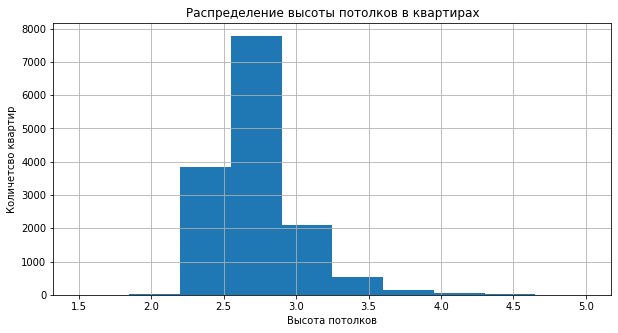

In [51]:
# Проверю результат
data[data['ceiling_height'] > 4.5]
data['ceiling_height'].hist(bins=10, range=(1.5, 5), figsize=(10, 5))

plt.title('Распределение высоты потолков в квартирах')
plt.xlabel('Высота потолков')
plt.ylabel('Количетсво квартир')

Это уже больше похоже на распределение Пуассона. Жаль, что не удалось обработать все выбитые значения

Нужно понять как быстро продавались квартиры

Text(0, 0.5, 'Количество квартир')

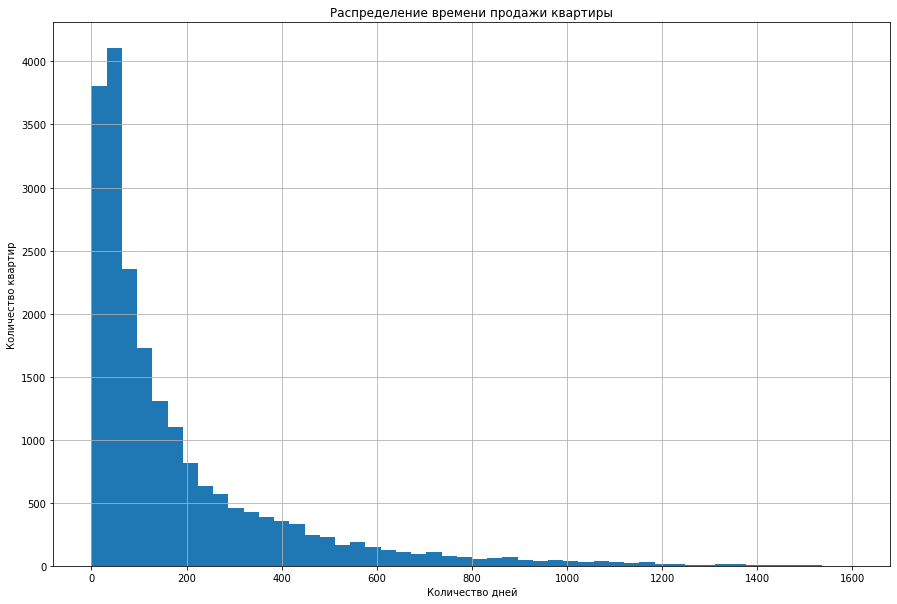

In [52]:
# Строю гистограмму
data['days_exposition'].hist(bins=50, range=(0, 1600), figsize=(15, 10), grid=True)

plt.title('Распределение времени продажи квартиры')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')

Есть аномальное значение, посмотрю строку таблицы

In [53]:
data[data['days_exposition'] > 1000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_of_publication,month_of_publication,year_of_publication,floor_types,cityCenters_nearest_in_km
109,2,7497600.0,62.5,2015-12-08,2,NaN,5.0,35.5,5,True,...,517.0,0.0,NaN,1048.0,119961.60,1,12,2015,последний,27.0
353,4,5990000.0,43.5,2015-05-08,1,3.00,5.0,25.0,4,True,...,93.0,0.0,NaN,1292.0,137701.15,4,5,2015,другой,10.0
398,7,12789000.0,79.3,2014-12-09,2,3.00,8.0,43.1,5,False,...,537.0,0.0,NaN,1345.0,161273.64,1,12,2014,другой,11.0
437,12,3350000.0,37.0,2015-02-24,1,2.55,6.0,17.8,6,True,...,185.0,1.0,755.0,1273.0,90540.54,1,2,2015,последний,34.0
459,13,5200000.0,51.0,2016-03-02,2,2.55,9.0,32.0,5,True,...,NaN,0.0,NaN,1153.0,101960.78,2,3,2016,другой,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23248,5,4900000.0,80.0,2014-12-25,3,NaN,15.0,47.0,14,True,...,NaN,1.0,NaN,1187.0,61250.00,3,12,2014,другой,NaN
23318,6,5620020.0,82.3,2015-03-10,3,2.70,21.0,45.6,12,True,...,NaN,1.0,31.0,1200.0,68287.00,1,3,2015,другой,17.0
23389,6,2850000.0,40.0,2015-01-26,1,2.60,10.0,19.0,8,False,...,NaN,1.0,NaN,1012.0,71250.00,0,1,2015,другой,NaN
23426,17,8778000.0,47.5,2014-12-29,1,3.00,7.0,NaN,4,True,...,1424.0,3.0,204.0,1360.0,184800.00,0,12,2014,другой,10.0


Не выглядит, что допустили ошибку в данных. Квартиры дейсвтительно могут продаваться больше трех, а то и четырех лет

#### Подведение итогов анализа

Расчитаю медиану и среднее значения по этому столбцу

In [54]:
median = data['days_exposition'].median()
mean = data['days_exposition'].mean().round()

# Использую print(), что бы строка вывелась без ковычек
print(f'Медианное значение: {median:.2f}')
print(f'Среднее значение: {mean:.2f}')

Медианное значение: 95.00
Среднее значение: 181.00


Медианное значение - 95 дней. То есть это нормальный срок продажи квартир. Хотя в среднем квартиры продавались за 181 день

Исходя из гистограммы можно сделать вывод, что квартиры, проданные за меньше, чем 50 дней относятся к быстрым продажам

А квартиры, которые "висят" дольше 300 дней, относятся к долгим продажам. А что продается дольше 1100 дней, уже экстримально долгие продажи

#### Посиск факторов, влияющих на стоимость и расчет корреляции

Для определения факторов, которые больше всего влияют на общую (полную) стоимость объекта следует воспользоваться методом pivot_table()

In [55]:
# Вызову info() что бы определить нужные колонки
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               23699 non-null  int64         
 1   last_price                 23699 non-null  float64       
 2   total_area                 23699 non-null  float64       
 3   first_day_exposition       23699 non-null  datetime64[ns]
 4   rooms                      23699 non-null  int64         
 5   ceiling_height             14504 non-null  float64       
 6   floors_total               23613 non-null  float64       
 7   living_area                21796 non-null  float64       
 8   floor                      23699 non-null  int64         
 9   is_apartment               23699 non-null  bool          
 10  studio                     23699 non-null  bool          
 11  open_plan                  23699 non-null  bool          
 12  kitc

В задании указаны следующие столбцы: 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_types', 'day_of_publication', 'month_of_publication', 'year_of_publication' и 'last_price'

Думаю, провести аналитику по всем столбцам сразу невозможно, следует их разделить

Начну с количества комнат. Высчитывать буду медианное значение

In [56]:
rooms_pivot = pd.pivot_table(data, values='last_price', index='rooms', aggfunc='median')

rooms_pivot

,last_price
rooms,
0,2700000.0
1,3600000.0
2,4770169.0
3,6200000.0
4,9000000.0
5,14000000.0
6,19000000.0
7,24900000.0
8,23095000.0


Логично, что с увеличением количества комнат растет цена. Эти данные понадобятся позже.
В квартирах, где 12 и 15 комнат явно есть выбитое значния. Но, думаю, я не могу их изменить. Это ключевой фактор в объявлении, его должны были заполнить корректно

In [57]:
# Посмотрю как на эти данные влияет этаж квартиры
rooms_floor_pivot = pd.pivot_table(data, values='last_price', index='rooms', columns='floor_types', aggfunc='median',
    fill_value=0
)

rooms_floor_pivot

floor_types,другой,первый,последний
rooms,,,
0,2775000,2183000,3100000
1,3700000,3070000,3200000
2,5140000,3850000,4100000
3,6500000,5000000,5700000
4,9800000,6500000,9600000
5,14000000,9925000,17000000
6,18888500,13351000,21250000
7,24900000,29500000,23000000
8,19900000,22190000,46000000


0 в данных, это отсутствие объявлений

Поэтапно рассмотрю количетсво комнат. Начну от 1 до 4. Квартиры показывают логичный результат. Первый и последний этаж дешевле остальных. Так как первый влечет риск ограбления, а на последнем могут быть проблемы с крышей

Но дальше встречаются аномальные значения. Например, 6 комнат, самая высокая цена на превом этаже, подобное встречается и в других строках. Скорее всего, на это влияют другие факторы...

В предыдущей строке, кода я попробовал добавить площадь к расчету, но этот параметр добавил хаоса. Решил вывести в отдельный код

In [58]:
# Как площадб влияет на стоимость
area_pivot = pd.pivot_table(data, values='last_price', index='total_area', aggfunc='median')

area_pivot

,last_price
total_area,
12.0,2400000.0
13.0,1850000.0
13.2,1686000.0
14.0,1190000.0
15.0,1725000.0
...,...
590.0,65000000.0
618.0,300000000.0
631.0,140000000.0


Видно, что чем больше площадь, тем больше стоимость(что логично)

Но есть аномальное значение у площади 12 или 14 м2. Видимо, на эти значения влияют другие факторы

In [59]:
# Стоит посмотреть как год публикации влияет на цену
year_pivot = pd.pivot_table(data, values='last_price', index='year_of_publication', aggfunc='median')

year_pivot

,last_price
year_of_publication,
2014,7700000.0
2015,5350000.0
2016,4550000.0
2017,4500000.0
2018,4550000.0
2019,5050000.0


В задании предложено посмотреть влияет ли день недели и месяц на цену. Но, мне кажется, что каких-то существенных изменений эти параметры не внесут. Поэтому, решил оставить только год

График показывает, что до 2018 года было падение цены и в 2019 снова рост

Для подведения итогов следует провести корреляцию

И здесь имеет смысл добавить колонки 'living_area' и 'kitchen_area'

Корреляцию провожу по столбцу 'last_price'

In [60]:
numeric_columns = ['last_price', 'rooms', 'floor_types', 'total_area', 'living_area', 'kitchen_area', 'year_of_publication']
correlation = data[numeric_columns].corr()['last_price'].sort_values(ascending=False)

correlation

last_price             1.000000
total_area             0.653675
living_area            0.566492
kitchen_area           0.519869
rooms                  0.363343
year_of_publication   -0.043089
Name: last_price, dtype: float64

#### Вывод по факторам и корреляции

По итогу, на инзменение цен больше всего вляет общая площадь квартиры. Из заданных параметров, меньше всего влияет год публикации объявления.

Если не брать в расчет год, то меньше всего влияет колличество комнат. Видимо, другие параметры, например, наличие парка или расстояние до центра влияют сильнее. Но в этом исследовании я их не использовал.

Отрицательная корреляция - это не ошибка. Она показывает, что на рынке недвижимости присутствует тренд спада цен(за указанный период).

#### Следующая задача: Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Для начала отберу необходимые столбцы: 'price_per_m2' и 'locality_name'

In [61]:
# Сторою сводную таблицу
price_pivot = pd.pivot_table(data, values='price_per_m2', index='locality_name', aggfunc=['mean', 'count'])

# 'mean', 'count' отвечают за подсчет среднего значения и покажет количество объявлений, соответсвенно

В отдельную переменную сохраняю топ-10 населенных пунктов по количеству объявлений

In [62]:
top_10 = price_pivot.sort_values(('count', 'price_per_m2'), ascending=False).head(10)

И выделю только нужные столбцы для вывода. Перезапишу названия столбцов для удобства просмотра рузельтата

In [63]:
top_10.columns = ['Средняя цена за м²', 'Количество объявлений']
top_10

,Средняя цена за м²,Количество объявлений
locality_name,,
санкт-петербург,114849.008793,15721
поселок мурино,85681.762572,556
поселок шушары,78677.364318,440
всеволожск,68654.473970,398
пушкин,103125.819377,369
колпино,75424.579112,338
поселок парголово,90175.913089,327
гатчина,68746.146515,307
деревня кудрово,92473.547559,299


Видно, что в Санкт-Петербурге наибольшее количество объявлений и наибольшая средняя стоимость(Столбец выводится по уменьшению количетсва объявлений)

Считаю максимальные и минимальные средния знаяние цен

In [64]:
max_price = top_10['Средняя цена за м²'].max()
min_price = top_10['Средняя цена за м²'].min()

In [65]:
# Здесь снова воспользуюсь print() для более удобного вывода
print(f"Максимальная средняя цена за м2 в Санкт-Петербурге: {max_price:.2f}")
print(f"Минимальная средняя цена за м2 в Выборге: {min_price:.2f}")

Максимальная средняя цена за м2 в Санкт-Петербурге: 114849.01
Минимальная средняя цена за м2 в Выборге: 58141.91


В Санкт-Петербурге нибольшая стоимость за м2, а в городе Выборг наименьшая. (Я использовал данные только top_10 по количеству объявлений)

#### Следующая задачу: Узнать как расстояние до центра влияет на стоимость квартиры

Фильтрую данные по Санкт-Петербургу и вывожу таблицу для просмотра.

In [66]:
spb_data = data[data['locality_name'] == 'санкт-петербург']
spb_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_of_publication,month_of_publication,year_of_publication,floor_types,cityCenters_nearest_in_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,True,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,True,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,True,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,True,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,True,...,353.0,2.0,652.0,29.0,100566.57,2,2,2018,другой,16.0
23690,3,5500000.0,52.00,2018-07-19,2,NaN,5.0,31.0,2,True,...,300.0,0.0,NaN,15.0,105769.23,3,7,2018,другой,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,True,...,NaN,1.0,806.0,519.0,129903.98,3,10,2016,другой,4.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,True,...,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой,4.0


Расчитываю среднее значение по расстоянию до центра.

In [67]:
# reset_index() использую, что бы данные обновлись корректно, а не стали индексами
average_price = spb_data.groupby('cityCenters_nearest_in_km')['price_per_m2'].mean().reset_index()

Строю график.

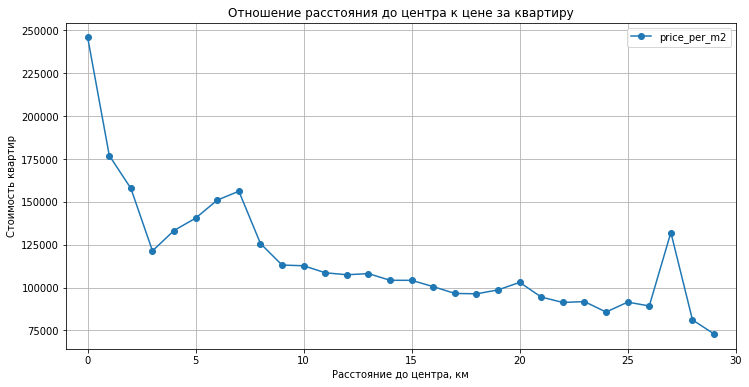

In [68]:
# По оси х данные из cityCenters_nearest_in_km, по оси у данные из price_per_m2, стиль о- рисует линии с точками, параметр figsize отвечает за размеры графика, xlim указывает границы графика и grid за сетку, для удобства просмотра
average_price.plot(x='cityCenters_nearest_in_km', y='price_per_m2', style='o-', figsize=(12, 6), xlim=(-1, 30), grid=True)

# Вывожу график через plt
plt.title('Отношение расстояния до центра к цене за квартиру')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Стоимость квартир')
plt.show()

По графику видно, что в общем, чем дадльше от цетра, тем ниже стоимость. Но есть исключения: 6 и 26 километры от центра, там присутсвтует аномальный рост цены.

Видимо на цену в этих местах влияют другие факторы.

### Напишите общий вывод

Исследование завершено.
По окончанию всех задач могу сказать следующее. В данных присутствует много пропусков. У меня получилось исправить некоторые, но не все, к сожалению. Возможно, если бы данные были полными изначально, исследование показало бы лучшие рузельтаты.
Моё исследование показало как обработать пропуски, привести таблицы и данные к общему виду и найти нужные значения.

Пройдусь по каождому блоку:
1. Осмотр данных и изучение:
    Мало что можно сказать, это был лишь просмотр;
2. Предобработка данных:
    В этой части работы я обрабатывал пропуски, искал дубликаты и менял типы данных. В процессе работы я делал заметки для понимания;
3. Добавление новых столбцов:
    Новые столбцы помогли работать в следующей части работы;
4. Исследовательский анализ:
    Самая объемная и интересная часть работы. Здесь я по заданиям проводил анализ данных. 
    - Работа показала как быстро продавались квартиры(медианное значение 95 дней, среднее занчение 181 день);
    - Определил, что больше всего на формирование стоимости влияет общая площадь жилья(0,65 от стоимости);
    - Узнал, что из 10 отобранных населенных пунктов по количеству объявлений максимальная средняя цена за м2 в Санкт-Петербурге: 114849 рублей, а минимальная средняя цена за м2 в Выборге: 58141 рублей; 
    - И завершающей задачей было понять как отдаленность от центра в Санкт-Питербурге влияет на стоимость квартир. График показал, что, чем дальше, тем дешевле. Но присутсвуют аномальные значения(6 и 26 километры от центра), видимо, на эти данные влияют другие факторы или неполнота данных.

В общем, скажу, что пропуски и ошибки в данных ни к чему хорошему не приводят. Хорошо, если бы их не было :)